In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
from plotnine import *
import warnings
warnings.filterwarnings(action='ignore')

# 
# 
## 다양체 학습 (Manifold Learning)
- 높은 차원의 데이터를 저차원으로 축소하는 방법

# 
### t-SNE (t-Distributed Stochastic Neighbor Embedding)
- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 탐색
- **각 데이터 포인트를 2차원에 무작위로 표현한 후, 원 본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게**
- 멀리 떨어진 포인트와 거리를 보존하는 것보다, 가까이 있는 포인트에 더 많은 비중 => **이웃 데이터 포인트에 대한 정보를 보존하려 노력**
-  쿨백-라이블러 발산목적 함수를 최적화 하기 위해 모멘텀을 적용한 뱇 경사 하강법 사용


### ```sklearn.manifold.TSNE(n_components, method, init, learning_rate, perplexity, early_exaggeration...)```
- ```method``` : 
    - 'barnes_hut' :그레디언트 계산의 복잡도를 $O(N^2)$에서 $O(NlogN)$으로 낮춰주는 반스-헛 방법 (기본값)
    - 'exaxt' : 정확한 계산은 하지만, 느림 => 대량의 데이터에 부적합

- ```init``` : 'pca' : default / 'random'
- ```learning_rate``` : 'auto' : default
- ```perplexity``` : 클 수록 더 많은 이웃을 포함하며, 작은 그룹을 무시 (default = 30) 
    - 데이터셋이 클 경우 ```perplexity```값도 커야함
- ```early_exaggeration``` : 초기 과장 단계에서 원본 공간의 클러스터들이 얼마나 멀게 2차원에 나타날지 결정 (default = 12)
    - 최소한 1보다 커야하고, 값이 클수록 간격이 증가

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

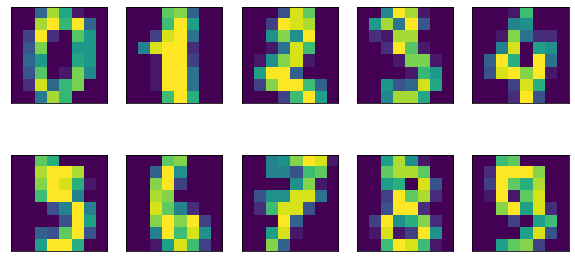

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

# 
# 

### TSNE vs PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2).fit(digits.data)
digits_pca = pca.fit_transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
          '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

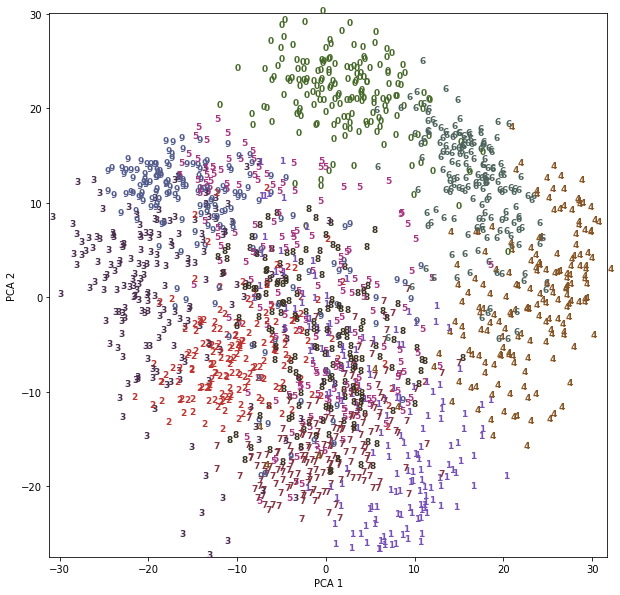

In [9]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 
# 

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

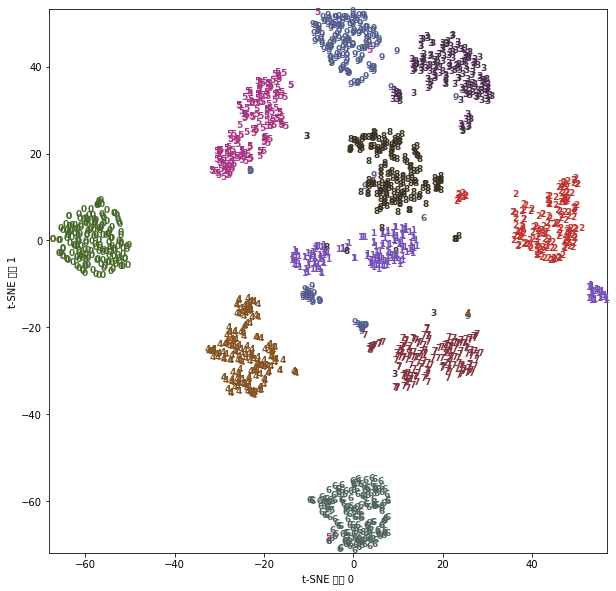

In [12]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")
plt.show() 

# 
# 
### Locally Linear Embedding (LLE, 국소 선형 엠베딩)
- https://excelsior-cjh.tistory.com/168
- 국소 이웃 거리를 보존하는 저차원 임베딩을 탐색

### ```sklearn.manifold.LocallyLinearEmbedding(n_neighbors, n_components, method = 'standard', ...)```

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

# 
# 
### Local Tangent Space Alignment (LTSA, 국소 탄젠트 공간 할당)
- 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
- 국소 탄젠트 공간을 정렬

### ```sklearn.manifold.LocallyLinearEmbedding(n_neighbors, n_components, method = 'ltsa', ...)```

# 
# 
### Hessian Eigenmapping (헤시안 고유 매핑)
- LLE의 문제를 해결한 다른 방법
- 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

### ```sklearn.manifold.LocallyLinearEmbedding(n_neighbors, n_components, method = 'hessian', ...)```

# 
# 
### Modified Locally Linear Embedding (수정 국소 선형 엠베딩)
- 각 이웃에 여러 가중치 벡터를 사용
- n_neighbors > n_components를 만족해야 함

### ```sklearn.manifold.LocallyLinearEmbedding(n_neighbors, n_components, method = 'modified', ...)```

# 
# 
### Isomap  (헤시안 고유 매핑)
- https://woosikyang.github.io/first-post.html
- 초기의 다양체 학습 알고리즘
- MDS와 커널 PCA의 확장으로 볼 수 있음
- 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

### ```sklearn.manifold.Isomap(n_neighbors, n_components, ...)```

In [15]:
from sklearn.manifold import Isomap

# 
# 
### Multi Dimensional Scaling  (MDS)
- https://for-my-wealthy-life.tistory.com/62
- 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

### ```sklearn.manifold.MDS(n_components, ...)```

In [16]:
from sklearn.manifold import MDS

# 
# 
### Spectral Embedding  (스펙트럼 분해)
- https://syj9700.tistory.com/11
- 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
- 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

### ```sklearn.manifold.SpectralEmbedding(n_components, ...)```

In [18]:
from sklearn.manifold import SpectralEmbedding